# Importing necessary libraries and tools

In [1]:
import numpy as np
import pandas as pd


## Generating fictional data (as realistic as possible) about users purshases

In [21]:

# Set random seed for reproducibility
np.random.seed(42)

# Number of users
num_users = 10000

# Simulate Sales and User Data
games = [
    "Assassin's Creed Black Flag", 
    "Assassin's Creed Unity", 
    "Assassin's Creed Syndicate", 
    "Assassin's Creed Origins", 
    "Assassin's Creed Odissey", 
    "Assassin's Creed Valhalla", 
    "Assassin's Creed Mirage", 
    "Watch Dogs",
    "Watch Dogs 2", 
    "Rainbow Six Siege", 
    "Far Cry 5", 
    "Far Cry 6",
    "Anno 2070",
    "Anno 1800",
    "The Crew",
    ]
platforms = ["PC", "PS5", "PS4", "Xbox", "Switch"]

user_ids = range(1, num_users + 1)
game_titles = np.random.choice(games, num_users)
purchase_dates = pd.date_range(start="2021-01-01", end="2023-10-31", freq="D").to_numpy()
selected_dates = np.random.choice(purchase_dates, num_users)
platforms_selected = np.random.choice(platforms, num_users)
prices = np.random.uniform(20, 60, num_users)  # Price range from 20 to 60
in_game_purchases = np.random.randint(0, 5, num_users)  # Number of in-game purchases

# Simulate Gamer Behavior Data
hours_played = np.random.randint(1, 100, num_users)
game_progression = np.random.randint(1, 101, num_users) 
achievements_unlocked = np.random.randint(0, 51, num_users)
multiplayer_usage = np.random.randint(0, 2, num_users)  # 1 for multiplayer, 0 for single-player

# Simulate Gamer Motivations, Expectations, and Satisfaction Surveys
reason_for_playing = np.random.randint(1, 6, num_users)
expectation_score = np.random.randint(1, 11, num_users)
satisfaction_score = np.random.randint(1, 11, num_users)

# Create DataFrame
df = pd.DataFrame({
    "UserID": user_ids,
    "GameTitle": game_titles,
    "PurchaseDate": selected_dates,
    "Platform": platforms_selected,
    "Price": prices,
    "InGamePurchases": in_game_purchases,
    "HoursPlayed": hours_played,
    "GameProgression": game_progression,
    "AchievementsUnlocked": achievements_unlocked,
    "MultiplayerUsage": multiplayer_usage,
    "ReasonForPlaying": reason_for_playing,
    "ExpectationScore": expectation_score,
    "SatisfactionScore": satisfaction_score
})

df.head() 

,UserID,GameTitle,PurchaseDate,Platform,Price,InGamePurchases,HoursPlayed,GameProgression,AchievementsUnlocked,MultiplayerUsage,ReasonForPlaying,ExpectationScore,SatisfactionScore
0,1,Assassin's Creed Mirage,2021-10-04,PS5,56.827538,1,12,96,26,1,3,5,3
1,2,Assassin's Creed Origins,2023-01-15,PC,39.432935,1,76,11,48,0,1,4,2
2,3,Anno 2070,2022-07-06,PC,45.587524,0,69,86,25,1,5,6,8
3,4,The Crew,2022-10-01,Switch,20.119205,1,61,40,8,1,4,7,7
4,5,Far Cry 5,2021-08-25,PC,30.128932,3,42,92,46,0,4,1,1


## Printing some general statistics about our data

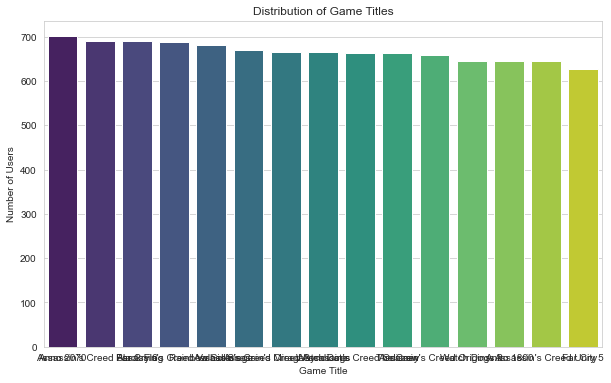

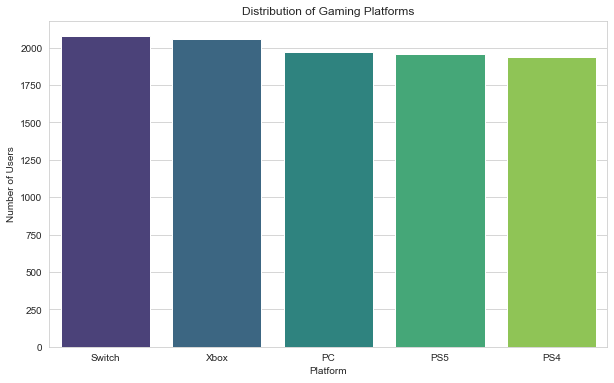

In [22]:
df.describe() 

import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Distribution of Game Titles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GameTitle', order=df['GameTitle'].value_counts().index, palette="viridis")
plt.title('Distribution of Game Titles')
plt.ylabel('Number of Users')
plt.xlabel('Game Title')
plt.show()

# Distribution of Platforms
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', order=df['Platform'].value_counts().index, palette="viridis")
plt.title('Distribution of Gaming Platforms')
plt.ylabel('Number of Users')
plt.xlabel('Platform')
plt.show()

# Scatter plot of Satisfaction vs. Expectation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ExpectationScore', y='SatisfactionScore', hue='GameTitle', palette="viridis", alpha=0.7)
plt.title('Satisfaction vs. Expectation Scores')
plt.ylabel('Satisfaction Score')
plt.xlabel('Expectation Score')
plt.legend(title='Game Title')
plt.show()

